# Task 02 - BAYES
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2

from bayes import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


#### Load data from *.npz files

In [2]:
data = np.load("data_33rpz_bayes.npz", allow_pickle=True)
alphabet = data["alphabet"]
images_test = data["images_test"]
labels_test = data["labels_test"]
contA = {'Mean': 124.2625,
         'Sigma': 1434.45420083,
         'Prior': 0.61538462}
contC = {'Mean': -2010.98,
         'Sigma': 558.42857106,
         'Prior': 0.38461538}
discreteA = {'Prior': 0.6153846153846154,
             'Prob': np.array([0.0125, 0., 0., 0.0125, 0.025, 0.0125, 0.025, 0.0375, 0.075, 0.1, 0.2125, 0.1375, 0.15, 0.1, 0.0875, 0.0125, 0., 0., 0., 0., 0.])}
discreteC = {'Prior': 0.38461538461538464,
             'Prob': np.array([0., 0., 0., 0.02, 0.02, 0.22, 0.46, 0.16, 0.1, 0.02, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

## Discrete

In [3]:
W1 = np.array([[0, 1],
              [1, 0]])
W2 = np.array([[0, 5], 
               [1, 0]])

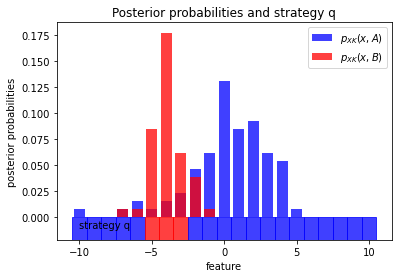

In [4]:
q_discrete1 = find_strategy_discrete(discreteA, discreteC, W1)

visualize_discrete(discreteA, discreteC, q_discrete1)
plt.savefig("classif_W1.png") 

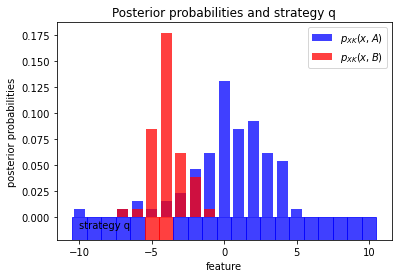

In [5]:
q_discrete2 = find_strategy_discrete(discreteA, discreteC, W2)

visualize_discrete(discreteA, discreteC, q_discrete2)
plt.savefig("classif_W2.png")

In [6]:
# uncomment following for interactive matplotlib
%matplotlib notebook
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(priorA=(0.,1.,0.01), w01=(0.1,10,0.01), w10=(0.1,10,0.01))
    def plot_bayes_cont_interactive(priorA=discreteA['Prior'], w01=W1[0,1], w10=W1[1,0]):
        W = np.array([[0, w01], [w10, 0]])
        discreteA_inter = {'Prob': discreteA['Prob'], 'Prior': priorA}
        discreteB_inter = {'Prob': discreteC['Prob'], 'Prior': 1 - priorA}
        q_discrete_inter = find_strategy_discrete(discreteA_inter, discreteB_inter, W)
        visualize_discrete(discreteA_inter, discreteB_inter, q_discrete_inter)

except ImportError:
    print('Optional feature.')

interactive(children=(FloatSlider(value=0.6153846153846154, description='priorA', max=1.0, step=0.01), FloatSl…

In [7]:
R_discrete = bayes_risk_discrete(discreteA, discreteC, W1, q_discrete1)

measurements_discrete = compute_measurement_lr_discrete(images_test)

labels_estimated_discrete = classify_discrete(measurements_discrete, q_discrete1)

error_discrete = classification_error(labels_estimated_discrete, labels_test)
print('Discrete classification error: {}'.format(error_discrete))

Discrete classification error: 0.225


#### Visualisation

In [8]:
I_A = images_test[:,:,labels_estimated_discrete == 0]
I_C = images_test[:,:,labels_estimated_discrete == 1]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(montage(I_A), cmap='gray')
plt.title('Images classified as A')
plt.subplot(1, 2, 2)
plt.imshow(montage(I_C), cmap='gray')
plt.title('Images classified as C')
plt.savefig("decision_discrete.png")

<IPython.core.display.Javascript object>

## Continuos

In [9]:
# we are searching for bayesian strategy for 2 normal distributions and
# zero-one cost function
W = np.array([[0, 1],
              [1, 0]])

# result not used, inspect the values e.g. with hist function
measurements_cont = compute_measurement_lr_cont(images_test)

q_cont = find_strategy_2normal(contA, contC)
print(q_cont)
plt.figure()
visualize_2norm(contA, contC, q_cont)
plt.savefig("thresholds.png")

R_cont = bayes_risk_2normal(contA, contC, q_cont)
print('Bayes risk: {}'.format(R_cont))

labels_estimated_cont = classify_2normal(measurements_cont, q_cont)

error_cont = classification_error(labels_estimated_cont, labels_test)

print('Continuous classification error: {}'.format(error_cont))

1.360379052605123e-06 0.00650909494906942 6.0069466399082465
{'t1': -3535.997150276402, 't2': -1248.7684903033442, 'decision': array([0, 1, 0])}


<IPython.core.display.Javascript object>

Bayes risk: 0.13519281686757106
Continuous classification error: 0.1


In [10]:
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(meanA=(-2500.,2500.,10.), sigmaA=(0.,2000.,10.), priorA=(0.,1.,0.01), meanB=(-2500.,2500.,10.), sigmaB=(0.,2000.,10.))
    def plot_bayes_cont_interactive(meanA=contA['Mean'], sigmaA=contA['Sigma'], priorA=contA['Prior'], meanB=contC['Mean'], sigmaB=contC['Sigma']):
        plt.figure()
        cont_A_inter = {'Mean': meanA, 'Sigma': sigmaA, 'Prior': priorA}
        cont_B_inter = {'Mean': meanB, 'Sigma': sigmaB, 'Prior': 1 - cont_A_inter['Prior']}
        q_cont_inter = find_strategy_2normal(cont_A_inter, cont_B_inter)
        visualize_2norm(cont_A_inter, cont_B_inter, q_cont_inter)

except ImportError:
    print('Optional feature.')

interactive(children=(FloatSlider(value=124.2625, description='meanA', max=2500.0, min=-2500.0, step=10.0), Fl…

#### Visualisation

In [11]:
I_A_cont = images_test[:,:,labels_estimated_cont == 0]
I_C_cont = images_test[:,:,labels_estimated_cont == 1]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(montage(I_A_cont), cmap='gray')
plt.title('Images classified as A')

plt.subplot(1, 2, 2)
plt.imshow(montage(I_C_cont), cmap='gray')
plt.title('Images classified as C')

plt.savefig("decision_2normal.png")

<IPython.core.display.Javascript object>